In [101]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [102]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [103]:
left = df[df.left==1]
left.shape

(3571, 10)

In [124]:
retained =df[df.left==0]
retained.shape

(11428, 10)

In [128]:
numeric_columns = df.select_dtypes(include =['number']).columns
result = df.groupby('left')[numeric_columns].mean()
result

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


<Axes: xlabel='salary'>

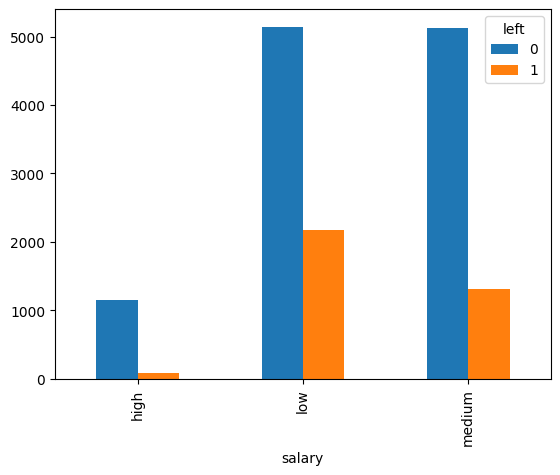

In [106]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department', ylabel='salary'>

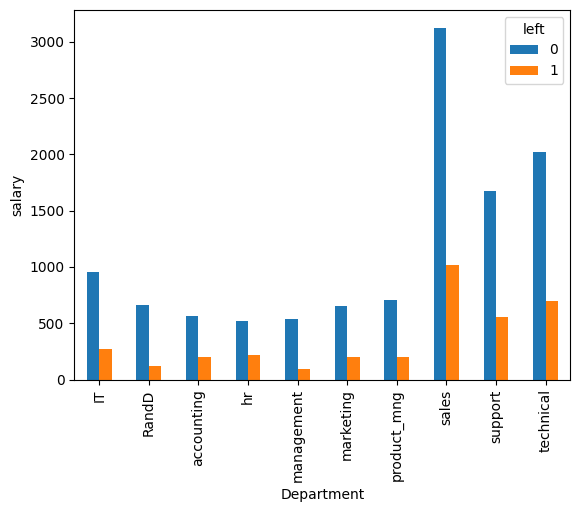

In [107]:
pd.crosstab(df.Department,df.left).plot(kind='bar',ylabel='salary')

In [108]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [109]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies= salary_dummies.astype(int)
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [110]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [111]:
df_with_dummies.drop('salary',axis='columns',inplace=True)

In [112]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [113]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [114]:
y=df.left

In [115]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [118]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [123]:
X_test.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
2347,0.69,174,0,False,True,False
1530,0.83,249,0,False,True,False
5348,0.92,201,0,False,True,False
11055,0.45,145,0,False,False,True
11903,0.96,253,0,False,False,True


In [120]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
model.score(X_test,y_test)


0.778